In [1]:
from lambeq import BobcatParser, spiders_reader, stairs_reader, cups_reader, TreeReader, AtomicType, IQPAnsatz
from discopy import grammar, Ty, Word
from pytket.circuit.display import render_circuit_jupyter

/usr/local/lib/python3.8/dist-packages/lambeq/ccg2discocat/ccg_parser.py:23: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Test sentence:

In [2]:
sentence = "I run"

Generate plot

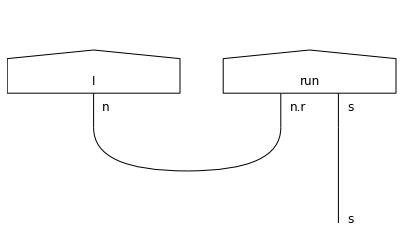

In [5]:
parser = BobcatParser()

diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14, 3), fontsize=12)

Simplify (rewriting)

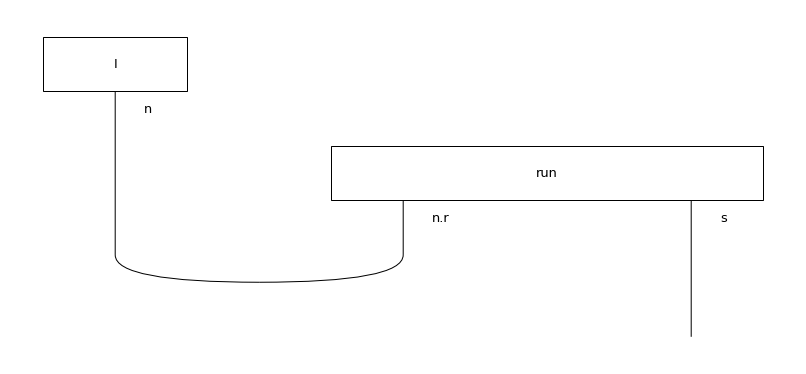

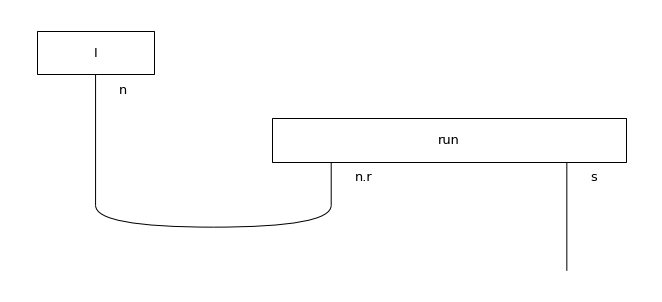

In [7]:
from lambeq import Rewriter

# Apply rewrite rule for prepositional phrases

rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=13)
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

Turn into circuit

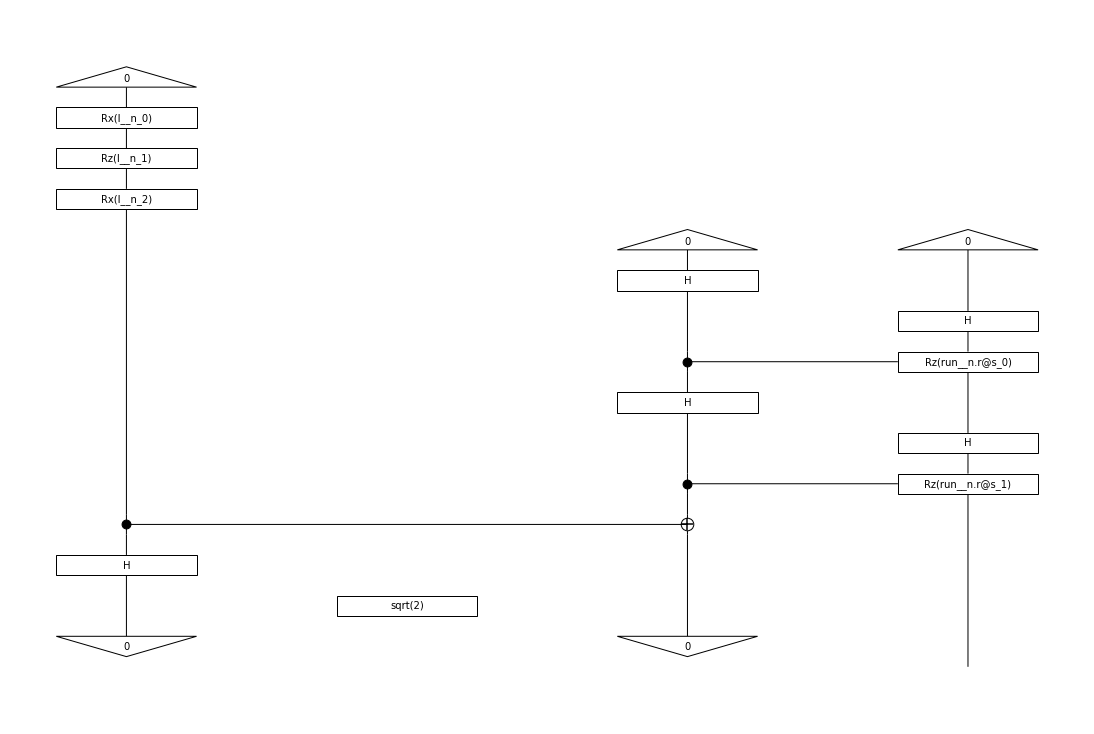

In [18]:
# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

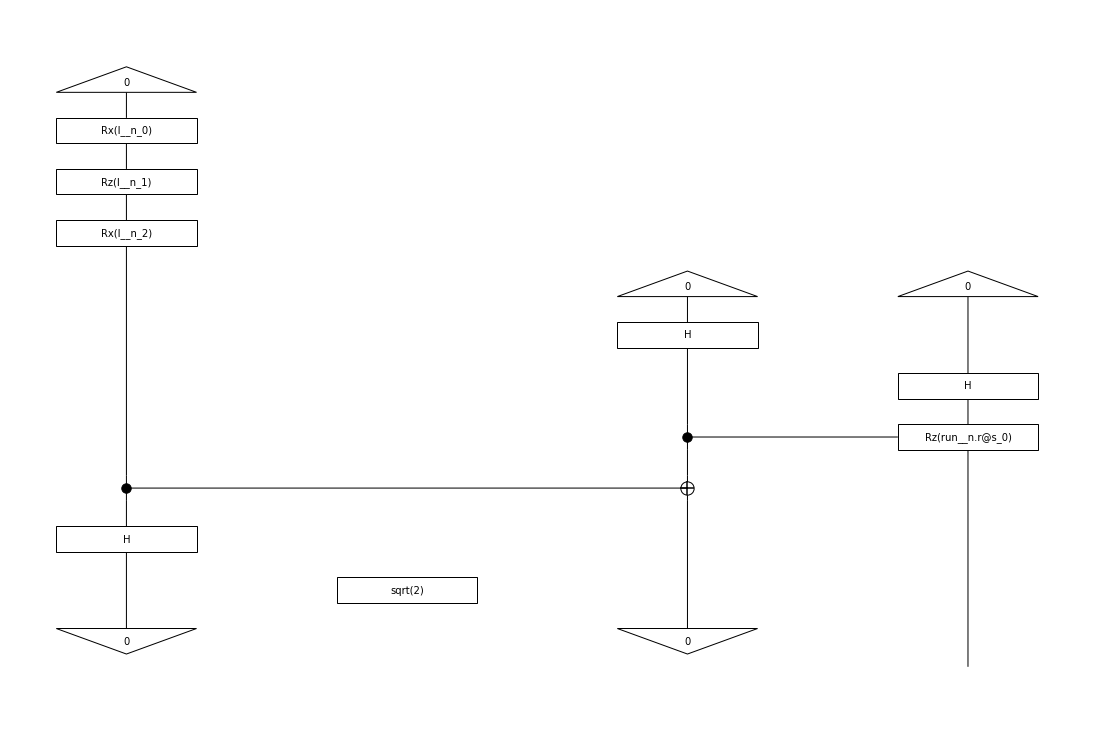

In [19]:
ansatz2 = IQPAnsatz({N: 1, S: 1}, n_layers=1)
discopy_circuit2 = ansatz2(diagram)
discopy_circuit2.draw(figsize=(15,10))

In [22]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

In [21]:
tket_circuit2 = discopy_circuit2.to_tk()

render_circuit_jupyter(tket_circuit2)